##### Imports 

In [1]:
import pandas as pd
import csv
import logging
from mephys_funcs import read_file, merge_dataframes, filter_date, drop_cols, drop_nans, \
create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)

##### Pandas Display Settings

In [2]:
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Lists/Paths

In [3]:
fields_jem = ["date", "organism_name", "name", "container", "rigOperator",
              "status", "roi_major", "roi_minor",
              "extraction.postPatch", "extraction.endPipetteR"]
fields_ephys = ["b'name'", "b'patched_cell_container'", "b'vrest'", "b'ri'", "b'sag'", 
                "b'tau'", "b'upstroke_downstroke_ratio_long_square'", 
                "b'latency'", "b'f_i_curve_slope'"]
fields_shiny = ["cell_name", "sample_id", "cluster_label", "broad_class_label",
                "subclass_label", "cell_specimen_project"]


path_jem = "Z:/Patch-Seq/compiled-jem-data/jem_metadata.csv"
path_ephys = "C:/Users/ramr/Documents/Github/analysis_projects/csv/mephys_features.csv"
path_shiny = "//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv"


drop_cols_list = ["b'name'", "b'patched_cell_container'", "cell_name", "sample_id"]
drop_nans_list = ["date", "name", "rigOperator"]

r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]

##### Main

In [9]:
def main():
    global merge_all, merge_all_glu, merge_all_gab
    jem = read_file(path_jem, fields_jem)
    ephys = read_file(path_ephys, fields_ephys)
    shiny = read_file(path_shiny, fields_shiny)
    merge_je = merge_dataframes(jem, ephys, "name", "b'name'")
    merge_all = merge_dataframes(merge_je, shiny, "name", "cell_name")
    merge_all = filter_date(merge_all, "date")
    merge_all = drop_cols(merge_all, drop_cols_list)
    merge_all = drop_nans(merge_all, drop_nans_list)
    merge_all = create_container_df(merge_all, "container")
    merge_all = create_cond_df(merge_all, "rigOperator", r_users)
    merge_all_glu = create_cond_df(merge_all, "broad_class_label", ["Glutamatergic"])
    merge_all_gab = create_cond_df(merge_all, "broad_class_label", ["GABAergic"])

In [10]:
if __name__ == "__main__":
    main()

INFO:mephys_funcs:Read file in as a pandas dataframe
INFO:mephys_funcs:Read file in as a pandas dataframe
INFO:mephys_funcs:Read file in as a pandas dataframe
INFO:mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:mephys_funcs:Sorted date to only display 2020 data
INFO:mephys_funcs:Dropped columns: ["b'name'", "b'patched_cell_container'", 'cell_name', 'sample_id']
INFO:mephys_funcs:Dropped NaNs from these columns: ['date', 'name', 'rigOperator']
INFO:mephys_funcs:Created a container_label column to show(ex.'PA')
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values


##### Mouse Region Dataframes

In [24]:
rsp = create_cond_df(merge_all, "roi_major", ["RSPd", "RSPv"])
ssp = create_cond_df(merge_all, "roi_major", ["SSp"])
orb = create_cond_df(merge_all, "roi_major", ["ORB"])
ctxsp = create_cond_df(merge_all, "roi_major", ["CTXsp"])
mo = create_cond_df(merge_all, "roi_major", ["MOp", "MOs"])
visp = create_cond_df(merge_all, "roi_major", ["VISp"])

INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values


##### Gluatamatergic Mouse Region Dataframes

In [11]:
rsp_glu = create_cond_df(merge_all_glu, "roi_major", ["RSPd", "RSPv"])
ssp_glu = create_cond_df(merge_all_glu, "roi_major", ["SSp"])
orb_glu = create_cond_df(merge_all_glu, "roi_major", ["ORB"])
ctxsp_glu = create_cond_df(merge_all_glu, "roi_major", ["CTXsp"])
mo_glu = create_cond_df(merge_all_glu, "roi_major", ["MOp", "MOs"])
visp_glu = create_cond_df(merge_all_glu, "roi_major", ["VISp"])

INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values


##### GABAergic Mouse Region Dataframes

In [12]:
rsp_gab = create_cond_df(merge_all_gab, "roi_major", ["RSPd", "RSPv"])
ssp_gab = create_cond_df(merge_all_gab, "roi_major", ["SSp"])
orb_gab = create_cond_df(merge_all_gab, "roi_major", ["ORB"])
ctxsp_gab = create_cond_df(merge_all_gab, "roi_major", ["CTXsp"])
mo_gab = create_cond_df(merge_all_gab, "roi_major", ["MOp", "MOs"])
visp_gab = create_cond_df(merge_all_gab, "roi_major", ["VISp"])

INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values
INFO:mephys_funcs:Created a conditional dataframe based on a list of values


##### Count Dictionary

In [25]:
region_dict = {"Overall Mouse Total count": merge_all.name.count(),
               "RSP Total": rsp.name.count(),
               "SSP Total": ssp.name.count(),
               "ORB Total": orb.name.count(),
               "CTXsp Total": ctxsp.name.count(),
               "MO Total": mo.name.count(),
               "VISP Total": visp.name.count()}

glu_dict = {"Glutamatergic Mouse Total count": merge_all_glu.name.count(),
            "RSP": rsp_glu.name.count(),
            "SSP": ssp_glu.name.count(),
            "ORB": orb_glu.name.count(),
            "CTXsp": ctxsp_glu.name.count(),
            "MO": mo_glu.name.count(),
            "VISP": visp_glu.name.count()}

gab_dict = {"GABAergic Mouse Total count": merge_all_gab.name.count(),
            "RSP": rsp_gab.name.count(),
            "SSP": ssp_gab.name.count(),
            "ORB": orb_gab.name.count(),
            "CTXsp": ctxsp_gab.name.count(),
            "MO": mo_gab.name.count(),
            "VISP": visp_gab.name.count()}

In [26]:
region_dict

{'Overall Mouse Total count': 159,
 'RSP Total': 67,
 'SSP Total': 25,
 'ORB Total': 16,
 'CTXsp Total': 10,
 'MO Total': 25,
 'VISP Total': 16}

In [20]:
glu_dict

{'Glutamatergic Mouse Total count': 128,
 'RSP': 53,
 'SSP': 18,
 'ORB': 11,
 'CTXsp': 6,
 'MO': 24,
 'VISP': 16}

In [21]:
gab_dict

{'GABAergic Mouse Total count': 31,
 'RSP': 14,
 'SSP': 7,
 'ORB': 5,
 'CTXsp': 4,
 'MO': 1,
 'VISP': 0}

##### Paths

In [ ]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
excel_path = "C:/Users/ramr/Documents/Github/analysis_projects/excel/"

##### Writing to csv_file

In [ ]:
#jem.to_csv(csv_path + "jem.csv")
#jem_2020.to_csv(csv_path + "jem_2020.csv")

##### Writing to excel_file

In [ ]:
writer = pd.ExcelWriter(excel_path + "new_region.xlsx")
merge_all.to_excel(writer, "All", freeze_panes=(1,0))
rsp.to_excel(writer, "RSP", freeze_panes=(1,0))
ssp.to_excel(writer, "SSP", freeze_panes=(1,0))
orb.to_excel(writer, "ORB", freeze_panes=(1,0))
ctxsp.to_excel(writer, "CTXsp", freeze_panes=(1,0))
mo.to_excel(writer, "MO", freeze_panes=(1,0))
visp.to_excel(writer, "VISp", freeze_panes=(1,0))
writer.save()

##### RSP Plots

In [35]:
rsp_glu.replace({"roi_major": {"RSPd": "RSP", "RSPv": "RSP"}}, inplace=True)

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [36]:
rsp_visp_glu = pd.concat([rsp_glu, visp_glu])

In [208]:
rsp_visp_glu

,date,organism_name,name,extraction.endPipetteR,extraction.postPatch,rigOperator,status,roi_major,roi_minor,container,b'vrest',b'ri',b'sag',b'tau',b'upstroke_downstroke_ratio_long_square',b'latency',b'f_i_curve_slope',cluster_label,cell_specimen_project,broad_class_label,subclass_label,container_label
0,2020-01-03 10:40:30 -0800,Mouse,Gad2-IRES-Cre;Ai14-504539.10.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSP,layer 2/3,PFS4_200103_701_A01,-65.282120,59.750024,0.148347,13.020941,3.711103,0.03164,0.149533,L2/3 IT VISp Agmat,mIVSCC-MET,Glutamatergic,L2/3 IT,PF
1,2020-01-03 13:00:07 -0800,Mouse,Pvalb-IRES-Cre;Ai14-504851.11.01.02,2000.0,nucleus_present,jessicat,SUCCESS,RSP,layer 2/3,PFS4_200103_703_A01,-66.313396,67.375034,0.269889,10.218081,2.976385,0.04538,0.060000,n15,mIVSCC-MET,Glutamatergic,L4,PF
2,2020-01-03 13:00:07 -0800,Mouse,Pvalb-IRES-Cre;Ai14-504851.11.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSP,layer 5,PFS4_200103_702_A01,-88.126678,36.550403,0.159878,9.964491,2.951999,0.04614,0.024934,L5 PT VISp Lgr5,mIVSCC-MET,Glutamatergic,L5 PT,PF
9,2020-01-06 15:54:23 -0800,Mouse,Vip-IRES-Cre;Ai14-504181.07.02.01,1500.0,nucleus_present,katherineb,SUCCESS,RSP,layer 5,PES4_200106_653_A01,-70.609880,96.781231,0.159202,18.911453,3.865665,0.05422,0.100000,L5 PT VISp C1ql2 Cdh13,mIVSCC-MET,Glutamatergic,L5 PT,PE
10,2020-01-06 15:59:07 -0800,Mouse,Vip-IRES-Cre;Ai14-504181.12.02.01,5.0,nucleus_present,jessicat,SUCCESS,RSP,layer 5,PFS4_200106_703_A01,-68.142401,137.500003,0.084605,12.307478,3.501689,0.04022,0.199398,n9,mIVSCC-MET,Glutamatergic,L5 PT,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2020-01-16 13:33:41 -0800,Mouse,Esr2-IRES2-Cre;Ai14-506385.03.01.02,1100.0,nucleus_present,kristenh,SUCCESS,VISp,layer 6a,P1S4_200116_002_A01,-59.593008,255.437493,0.027354,34.028713,4.373670,0.04598,0.180203,L6 IT VISp Penk Col27a1,mIVSCC-MET,Glutamatergic,L6 IT,P1
134,2020-01-16 14:34:44 -0800,Mouse,Esr2-IRES2-Cre;Ai14-506385.03.02.02,1800.0,nucleus_present,katherineb,SUCCESS,VISp,layer 5,PES4_200116_655_A01,-75.442434,157.937467,0.028307,21.828857,3.581690,0.05750,0.087750,L6 IT VISp Car3,mIVSCC-MET,Glutamatergic,L6 IT,PE
135,2020-01-16 14:34:44 -0800,Mouse,Esr2-IRES2-Cre;Ai14-506385.03.02.01,1000.0,nucleus_present,katherineb,SUCCESS,VISp,layer 5,PES4_200116_654_A01,-83.142639,134.187505,0.079507,22.286570,3.597191,0.05322,0.170000,L6 IT VISp Car3,mIVSCC-MET,Glutamatergic,L6 IT,PE
138,2020-01-17 10:33:14 -0800,Mouse,Esr2-IRES2-Cre;Ai14-506389.03.01.02,3000.0,nucleus_present,jessicat,SUCCESS,VISp,layer 6a,PFS4_200117_701_A01,-72.435637,88.071622,0.002853,13.815666,3.243047,0.13772,0.170000,L6 IT VISp Car3,mIVSCC-MET,Glutamatergic,L6 IT,PF


In [190]:
def box_plt(col_y, df=rsp_visp_glu):
    """
    """
    colors=["#a1d99b", "#9ecae1"]
    fig_dims = (12, 8)
    f, axes = plt.subplots(figsize=fig_dims)

    ax = sns.boxplot(x="subclass_label",
                     y=col_y,
                     hue="roi_major",
                     data=df,
                     order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                     hue_order = ["RSP", "VISp"],
                     palette=colors,
                     saturation=1,
                     width=0.8,
                     linewidth=1,
                     showfliers=False,)

    ax = sns.stripplot(x="subclass_label",
                       y=col_y,
                       hue="roi_major",
                       data=df,
                       order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                       hue_order = ["RSP", "VISp"],
                       jitter=False,
                       size=4.5,
                       color="0.2",
                       split=True)
    
    sns.despine(trim=True, left=False)
    ax.set(xlabel="T-types", ylabel="Resting Membrane Potential (mV)")
    #ax.invert_yaxis()
    #ax.set(ylim=(-85, -55)) Default is -90, -55
    #ax.set_ylabel("col_label", fontsize=16)
    #plt.savefig(sample.jpeg", bbox_inches="tight") 

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Resting Membrane Potential (mV)'), Text(0.5, 0, 'T-types')]

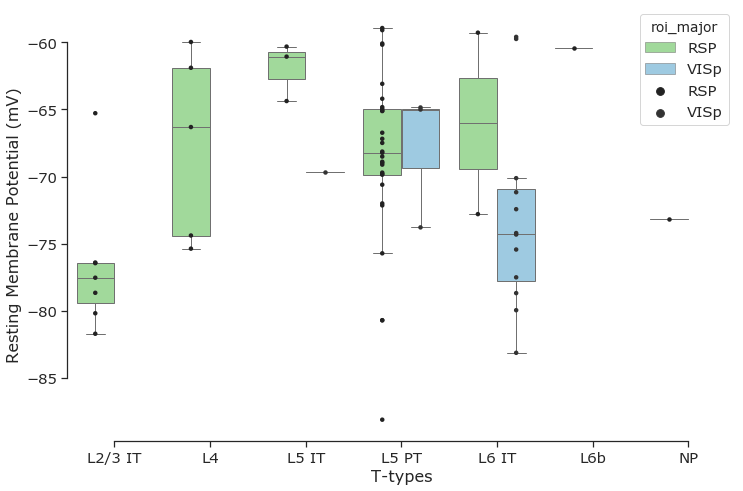

In [193]:
colors=["#a1d99b", "#9ecae1"]
fig_dims = (12, 8)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.boxplot(x="subclass_label",
                 y="b'vrest'",
                 hue="roi_major",
                 data=rsp_visp_glu,
                 order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                 hue_order = ["RSP", "VISp"],
                 palette=colors,
                 saturation=1,
                 width=0.8,
                 linewidth=1,
                 showfliers=False,)

ax = sns.stripplot(x="subclass_label",
                   y="b'vrest'",
                   hue="roi_major",
                   data=rsp_visp_glu,
                   order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                   hue_order = ["RSP", "VISp"],
                   jitter=False,
                   size=4.5,
                   color="0.2",
                   split=True)

sns.despine(trim=True, left=False)
ax.set(xlabel="T-types", ylabel="Resting Membrane Potential (mV)")
#ax.invert_yaxis()
#ax.set(ylim=(-85, -55)) Default is -90, -55
#ax.set_ylabel("col_label", fontsize=16)
#plt.savefig(sample.jpeg", bbox_inches="tight") 

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Resting Membrane Potential (mV)'), Text(0.5, 0, 'T-types')]

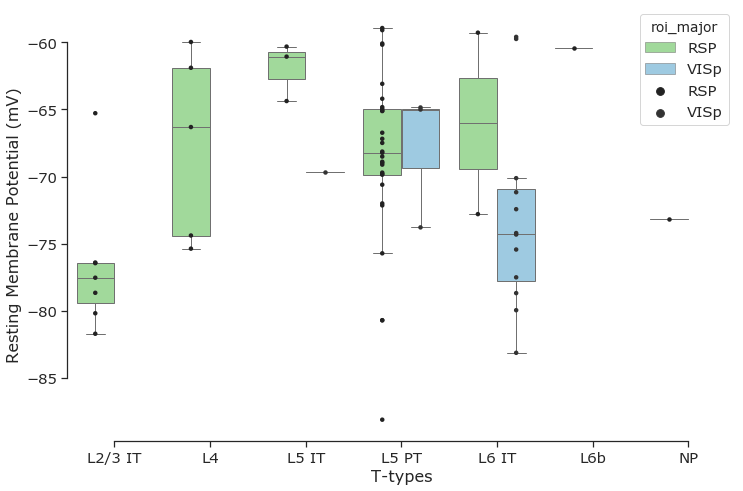

In [197]:
colors=["#a1d99b", "#9ecae1"]

fig_dims = (12, 8)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.boxplot(x="subclass_label",
                 y="b'vrest'",
                 hue="roi_major",
                 data=rsp_visp_glu,
                 order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                 hue_order = ["RSP", "VISp"],
                 palette=colors,
                 saturation=1,
                 width=0.8,
                 linewidth=1,
                 showfliers=False,)

ax = sns.stripplot(x="subclass_label",
                   y="b'vrest'",
                   hue="roi_major",
                   data=rsp_visp_glu,
                   order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                   hue_order = ["RSP", "VISp"],
                   jitter=False,
                   size=4.5,
                   color="0.2",
                   split=True)

sns.despine(trim=True, left=False)
ax.set(xlabel="T-types", ylabel="Resting Membrane Potential (mV)")
#ax.invert_yaxis()
#ax.set(ylim=(-85, -55)) Default is -90, -55

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Input Resistance (MOhms)'), Text(0.5, 0, 'T-types')]

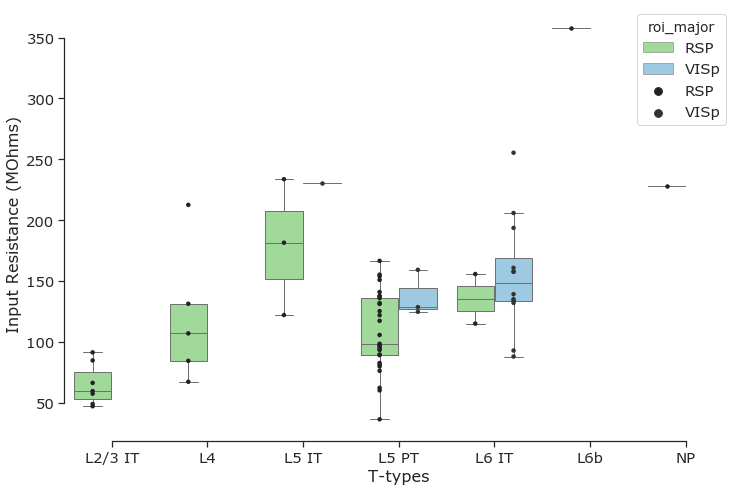

In [207]:
colors=["#a1d99b", "#9ecae1"]

fig_dims = (12, 8)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.boxplot(x="subclass_label",
                 y="b'ri'",
                 hue="roi_major",
                 data=rsp_visp_glu,
                 order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                 hue_order = ["RSP", "VISp"],
                 palette=colors,
                 saturation=1,
                 width=0.8,
                 linewidth=1,
                 showfliers=False,)

ax = sns.stripplot(x="subclass_label",
                   y="b'ri'",
                   hue="roi_major",
                   data=rsp_visp_glu,
                   order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                   hue_order = ["RSP", "VISp"],
                   jitter=False,
                   size=4.5,
                   color="0.2",
                   split=True)

sns.despine(trim=True, left=False)
ax.set(xlabel="T-types", ylabel="Input Resistance (MOhms)")
#ax.invert_yaxis()
#ax.set(ylim=(0, 350)) 

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'f i Curve Slope'), Text(0.5, 0, 'T-types')]

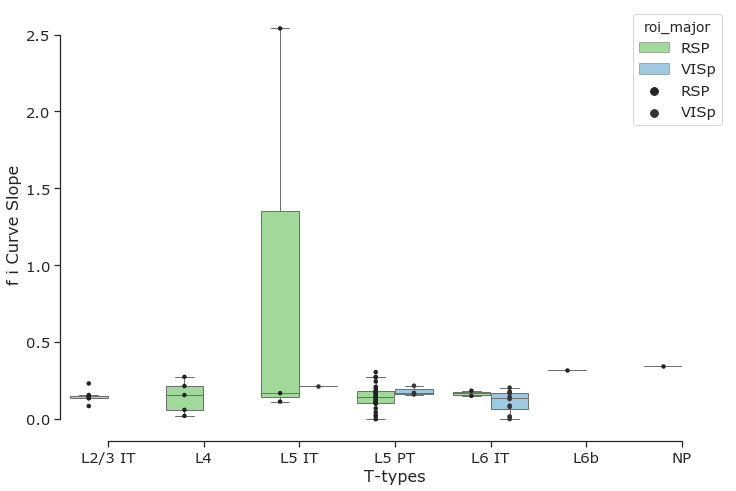

In [210]:
colors=["#a1d99b", "#9ecae1"]

fig_dims = (12, 8)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.boxplot(x="subclass_label",
                 y="b'f_i_curve_slope'",
                 hue="roi_major",
                 data=rsp_visp_glu,
                 order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                 hue_order = ["RSP", "VISp"],
                 palette=colors,
                 saturation=1,
                 width=0.8,
                 linewidth=1,
                 showfliers=False,)

ax = sns.stripplot(x="subclass_label",
                   y="b'f_i_curve_slope'",
                   hue="roi_major",
                   data=rsp_visp_glu,
                   order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                   hue_order = ["RSP", "VISp"],
                   jitter=False,
                   size=4.5,
                   color="0.2",
                   split=True)

sns.despine(trim=True, left=False)
ax.set(xlabel="T-types", ylabel="f i Curve Slope")
#ax.invert_yaxis()
#ax.set(ylim=(0, 350)) 

##### All Plots

In [ ]:
def box_swarm_plt(col_x, col_y, df):
    fig_dims = (20, 10)
    f, axes = plt.subplots(1, 3, figsize=fig_dims)

    sns.boxplot(x=col_x, y=col_y, data=df, palette="Paired", ax=axes[0])
    sns.swarmplot(x=col_x, y=col_y, data=df,  color="0.2", ax=axes[0])
    
    sns.boxplot(x=col_x, y=col_y, data=df, palette="Paired", ax=axes[1])
    sns.swarmplot(x=col_x, y=col_y, data=df,  color="0.2", ax=axes[1])
    
    sns.boxplot(x=col_x, y=col_y, data=df, palette="Paired", ax=axes[2])
    sns.swarmplot(x=col_x, y=col_y, data=df,  color="0.2", ax=axes[2])

In [ ]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=rsp, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=rsp, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=rsp, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=rsp, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=rsp, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=rsp, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

In [ ]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=mo, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=mo, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=mo, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=mo, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=mo, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=mo, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

###### Misc


def date_return(df):
    df = df.reset_index()
    start_date = df["date"].iloc[0][0:10]
    end_date = df["date"].iloc[-1][0:10]
    df = df.set_index(["date"])
    logger.info("Created date")
    return df, start_date, end_date



def print_counts():
    """Prints counts of dataframes"""
    #print(f"Date Range: {start_date} to {end_date}")
    print(f"Overall Total count: {jem_2020.container.count()}")
    print()
    print(f"Mouse Total count: {mjem_2020.organism_name.count()}")
    print(f"-RSPd count: {rspd.organism_name.count()}")
    print(f"-RSPv count: {rspv.organism_name.count()}")
    print(f"-SSp count: {ssp.organism_name.count()}")
    print(f"-ORB count: {orb.organism_name.count()}")
    print(f"-CTXsp count: {ctxsp.organism_name.count()}")
    print(f"-MOp count: {mop.organism_name.count()}")
    print(f"-MOs count: {mos.organism_name.count()}")
    print(f"-HY count: {hy.organism_name.count()}")
    print(f"-HIP count: {hip.organism_name.count()}")
    print(f"-VISP count: {visp.organism_name.count()}")
    print()
    print(f"Human Total count: {hjem_2020.organism_name.count()}")
    print(f"-Human Acute count: {hajem_2020.organism_name.count()}")
    print(f"-Human Culture count: {hcjem_2020.organism_name.count()}")

def main():
    jem_2020 = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    jem_2020 = choice()
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    #jem_2020 = date_return(jem_2020)
    #print(start_date)

    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    hjem_2020 = create_cond_df(jem_2020, "organism_name", "Human")
    hajem_2020 = hjem_2020[hjem_2020["p_container"] != "PCS4"]
    hcjem_2020 = create_cond_df(hjem_2020, "p_container", "PCS4")

    mjem_2020 = create_region_col(mjem_2020)
    rspd = create_cond_df(mjem_2020, "roi_major", "RSPd")
    rspv = create_cond_df(mjem_2020, "roi_major", "RSPv")
    ssp = create_cond_df(mjem_2020, "roi_major", "SSp")
    orb = create_cond_df(mjem_2020, "roi_major", "ORB")
    ctxsp = create_cond_df(mjem_2020, "roi_major", "CTXsp")
    mop = create_cond_df(mjem_2020, "roi_major", "MOp")
    mos = create_cond_df(mjem_2020, "roi_major", "MOs")
    hy = create_cond_df(mjem_2020, "roi_major", "HY")
    hip = create_cond_df(mjem_2020, "roi_major", "HIP")
    visp = create_cond_df(mjem_2020, "roi_major", "VISP")
    logger.info("Created region pandas dataframes")
    print_counts()



def create_region_col(df):
    """"""
    df["new_region"] = "default_value"
    LOGGER.info("Created a new column(new_region) with default_value")
    
    c_region = ["RSPd", "RSPv", "SSp"] 
    s_region = ["MOs", "MOp", "ORB", "CTXsp"]
    o_region = ["HY", "HIP"]
    v_region = ["VISp"]
    
    df["new_region"][df.roi_major.str.contains("|".join(c_region))] = "coronal_region"
    df["new_region"][df.roi_major.str.contains("|".join(s_region))] = "sagittal_region"
    df["new_region"][df.roi_major.str.contains("|".join(o_region))] = "other_region"
    df["new_region"][df.roi_major.str.contains("|".join(v_region))] = "v1_region"
    LOGGER.info("Filled in new_region column with region labels")
    return df


def choice():
    """"""
    r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]
    r_user = ["ramr"]
    
    global entry

    print("These are all user options: kristenh, lindsayn, ramr, katherineb, jessicat")
    entry = input("Enter single user name or all users (a):")
    if entry == "a":
        jem_2020 = sort_df(jem, r_users)
    elif entry == "kristenh":
        jem_2020 = sort_df(jem, r_users[0])
    elif entry == "lindsayn":
        jem_2020 = sort_df(jem, r_users[1])
    elif entry == "ramr":
        jem_2020 = sort_df(jem, r_users[2])
    elif entry == "katherineb":
        jem_2020 = sort_df(jem, r_users[3])
    elif entry == "jessicat":
        jem_2020 = sort_df(jem, r_users[4])
    else: 
        print("Please choose between option 'a' or 'r'.")
    LOGGER.info("Sorted jem by date range: 1/03/2020 - present")
    return jem_2020

#if __name__ == "__main__":
    
     """jem = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    jem_2020 = choice()
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    jem_2020 = jem_2020.reset_index()
    start_date = jem_2020["date"].iloc[0][0:10]
    end_date = jem_2020["date"].iloc[-1][0:10]
    jem_2020 = jem_2020.set_index(["date"])
    
    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    hjem_2020 = create_cond_df(jem_2020, "organism_name", "Human")
    hajem_2020 = hjem_2020[hjem_2020["p_container"] != "PCS4"]
    hcjem_2020 = create_cond_df(hjem_2020, "p_container", "PCS4")

    mjem_2020 = create_region_col(mjem_2020)
    rspd = create_cond_df(mjem_2020, "roi_major", "RSPd")
    rspv = create_cond_df(mjem_2020, "roi_major", "RSPv")
    ssp = create_cond_df(mjem_2020, "roi_major", "SSp")
    orb = create_cond_df(mjem_2020, "roi_major", "ORB")
    ctxsp = create_cond_df(mjem_2020, "roi_major", "CTXsp")
    mop = create_cond_df(mjem_2020, "roi_major", "MOp")
    mos = create_cond_df(mjem_2020, "roi_major", "MOs")
    hy = create_cond_df(mjem_2020, "roi_major", "HY")
    hip = create_cond_df(mjem_2020, "roi_major", "HIP")
    visp = create_cond_df(mjem_2020, "roi_major", "VISP")
    logger.info("Created region pandas dataframes")
    
    print_counts()"""
    